# Project 1: Linear Regression
Download the prostate cancer dataset from the books resources:

https://web.stanford.edu/~hastie/ElemStatLearn/data.html

Replicate the analysis from chapter 3 of this dataset. Divide your data into roughly 80% train, 10% validation, 10% test. You must keep this split for all 3 parts of this assignment in order to compare the methods fairly. Replicate the textbooks analysis of this dataset. by doing the following

## Fetching Data and Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if os.path.exists('prostate.data'):
    os.remove('prostate.data')
!wget https://hastie.su.domains/ElemStatLearn/datasets/prostate.data

raw_data = pd.read_csv('prostate.data', sep='\t', index_col="Unnamed: 0")
data = raw_data.drop(columns=['train'])
data = data.sample(frac=1, random_state=2).reset_index(drop=True)
data

--2024-09-25 16:16:26--  https://hastie.su.domains/ElemStatLearn/datasets/prostate.data
Resolving hastie.su.domains (hastie.su.domains)... 159.89.149.97
Connecting to hastie.su.domains (hastie.su.domains)|159.89.149.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7130 (7.0K)
Saving to: ‘prostate.data’

prostate.data       100%[===================>]   6.96K  --.-KB/s    in 0s      

2024-09-25 16:16:27 (1.91 GB/s) - ‘prostate.data’ saved [7130/7130]



,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1.423108,3.657131,73,-0.579819,0,1.658228,8,15,2.157559
1,1.040277,3.128951,67,0.223144,0,0.048790,7,80,1.848455
2,3.153590,3.516013,59,-1.386294,0,-1.386294,7,5,2.704711
3,1.781709,3.451574,63,0.438255,0,1.178655,7,60,1.713798
4,-0.415515,3.516013,70,1.244155,0,-0.597837,7,30,1.470176
...,...,...,...,...,...,...,...,...,...
92,1.771557,3.896909,61,-1.386294,0,0.810930,7,6,2.374906
93,-0.544727,3.375880,59,-0.798508,0,-1.386294,6,0,1.695616
94,1.214913,3.825375,69,-1.386294,1,0.223144,7,20,3.056357
95,1.541159,3.061052,66,-1.386294,0,-1.386294,6,0,1.446919


In [2]:
# Separate the features and target variables
X = data.drop(columns=['lpsa'])
y = data['lpsa']

# Split the data into train, validation, and test sets ~(80% train, 10% validation, 10% test)
train_size = int(0.8 * len(data))
val_size = int((len(data) - train_size )// 2)

X_train = X[:train_size]
X_val = X[train_size:train_size + val_size]
X_test = X[train_size + val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

In [3]:
# Add a column of ones for the intercept term
# X_with_intercept = X.assign(intercept=1)
# X_train_with_intercept = X_train.assign(intercept=1)
# X_val_with_intercept = X_val.assign(intercept=1)
# X_test_with_intercept = X_test.assign(intercept=1)

## Part a

a) Plain old linear regression, with no regularization. You must code this one by hand (i.e use equation 3.6 to find the betas).  Report the mean squared error on the test dataset. Replicate tables 3.1 and 3.2. You will not need the validation set for this part of the assignment.



In [4]:
def plain_linear_regression(X_train, y_train, X_test, y_test):
    X_train_with_intercept = X_train.assign(intercept=1)
    X_test_with_intercept = X_test.assign(intercept=1)

    # Compute the beta coefficients using equation 3.6: beta_hat = (X^T X)^(-1) X^T y
    coefficients = np.linalg.inv(X_train_with_intercept.values.T @ X_train_with_intercept.values) @ X_train_with_intercept.values.T @ y_train

    # Predict on the test set
    y_test_pred = X_test_with_intercept.values @ coefficients

    # Calculate the mean squared error (MSE) on the test set
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Calculate the mean squared error (MSE) on the train set
    train_mse = np.mean((y_train - X_train_with_intercept.values @ coefficients) ** 2)

    return coefficients, test_mse, train_mse

plain_coefficients, plain_test_mse, plain_train_mse = plain_linear_regression(X_train, y_train, X_test, y_test)
print(f"Beta coefficients: {plain_coefficients}")
print(f"Mean Squared Error on the test set: {plain_test_mse}")

Beta coefficients: [ 0.58866781  0.70404258 -0.02548682  0.12545381  0.80394533 -0.09564226
 -0.067748    0.00620273  0.85468472]
Mean Squared Error on the test set: 0.41424762114386604


In [5]:
## Replicate Table 3.1: Correlation matrix of features
def generate_correlation_matrix(X):
    correlation_matrix = X.corr()
    return correlation_matrix
correlation_matrix = generate_correlation_matrix(X)
correlation_matrix

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


In [6]:
## Replicate Table 3.2: Coefficients with standard errors and Z-scores
def generate_coefficients_table(X, y):
    X_with_intercept = X.assign(intercept=1)
    # Compute the beta coefficients of the entire dataset
    coefficients = np.linalg.inv(X_with_intercept.values.T @ X_with_intercept.values) @ X_with_intercept.values.T @ y

    # Predict on the entire dataset
    y_pred = X_with_intercept.values @ coefficients

    # Estimate the residual variance: sigma_hat^2 = RSS / (n - p - 1)
    residual_variance = np.sum((y - y_pred)**2) / (X_with_intercept.shape[0] - X_with_intercept.shape[1]) # - 1 accounted for by the intercept term

    # Standard errors of coefficients: SE(beta_j) = sqrt(sigma_hat^2 * (X^T X)^{-1}_{jj})
    XtX_inverse_diagonal = np.diag(np.linalg.inv(X_with_intercept.values.T @ X_with_intercept.values))
    standard_errors = np.sqrt(residual_variance * XtX_inverse_diagonal)

    # Z-scores
    z_scores = coefficients / standard_errors

    # Organize into a DataFrame
    coefficients_df = pd.DataFrame({
        "Coefficient": coefficients,
        "Std. Error": standard_errors,
        "Z Score": z_scores
    }, index=list(X_with_intercept.columns))
    return coefficients_df
plain_coefficients_table = generate_coefficients_table(X, y)
plain_coefficients_table

,Coefficient,Std. Error,Z Score
lcavol,0.564341,0.087833,6.425129
lweight,0.622020,0.200897,3.096218
age,-0.021248,0.011084,-1.917000
lbph,0.096713,0.057913,1.669971
svi,0.761673,0.241176,3.158168
lcp,-0.106051,0.089868,-1.180075
gleason,0.049228,0.155341,0.316903
pgg45,0.004458,0.004365,1.021117
intercept,0.181561,1.320568,0.137487


## Part b

b) Ridge regression. You must also code this one by hand(eq 3.44 to find the betas). Select the optimal value of Lambda by cross-validation using the validation dataset. Report the mean squared error on the test dataset, using the best lambda you found on the validation set. DO NOT USE THE TEST DATASET TO CHOOSE LAMBDA. Plot a ridge plot similar to figure 3.8, but you can just sweep the lambda parameter (you don't have to scale it to degrees of freedom).

In [7]:
def get_ridge_coefficients(X, y, lambda_value):
    n, p = X.shape
    identity_matrix = np.eye(p)
    # Convert X and y to NumPy arrays if they are DataFrames or Series
    X_np = X.to_numpy() if isinstance(X, (pd.DataFrame, pd.Series)) else X
    y_np = y.to_numpy() if isinstance(y, (pd.DataFrame, pd.Series)) else y

    ridge_coefficients = np.linalg.solve(X_np.T @ X_np + lambda_value * identity_matrix, X_np.T @ y_np) # Equation 3.44: beta_ridge = (X^T X + lambda I)^(-1) X^T y

    if isinstance(X, pd.DataFrame):
        ridge_coefficients = pd.Series(ridge_coefficients, index=X.columns)
    return ridge_coefficients

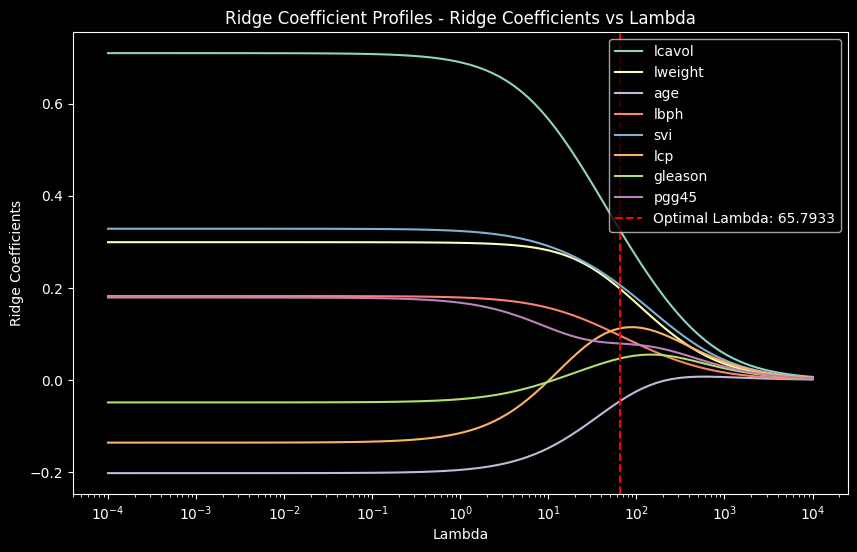

Optimal lambda: 65.79332246575683
MSE on the test set with Ridge regression: 0.22810905585416497


In [8]:
def ridge_regression(X_train, y_train, X_val, y_val, X_test, y_test):
    # Standardize the features (center and scale)
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_train_standardized = (X_train - X_mean) / X_std
    X_val_standardized = (X_val - X_mean) / X_std
    X_test_standardized = (X_test - X_mean) / X_std

    # Center the target variable
    y_train_mean = y_train.mean()
    y_train_centered = y_train - y_train_mean

    # Range of lambda values for cross-validation
    lambda_range = np.logspace(-4, 4, 100)

    # Cross-validation to find the optimal lambda & store the coefficient profiles
    val_mse_list = []
    coefficient_profiles = []
    for lambda_value in lambda_range:
        coefficients = get_ridge_coefficients(X_train_standardized, y_train_centered, lambda_value)
        y_val_pred = X_val_standardized.values @ coefficients.values + y_train_mean
        mse_val = np.mean((y_val - y_val_pred) ** 2)
        val_mse_list.append(mse_val)

        coefficient_profiles.append(coefficients)

    optimal_lambda = lambda_range[np.argmin(val_mse_list)]

    # Compute the ridge regression coefficients on the full training set with the optimal lambda
    optimal_coefficients = get_ridge_coefficients(X_train_standardized, y_train_centered, optimal_lambda)

    # Predict on the test set and restore the intercept
    y_test_pred = X_test_standardized.values @ optimal_coefficients.values + y_train_mean

    # Calculate MSE on the test set
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Calculate MSE on the train set
    y_train_pred = X_train_standardized.values @ optimal_coefficients.values + y_train_mean
    train_mse = np.mean((y_train - y_train_pred) ** 2)


    # Plot the Ridge Path for standardized data
    plt.figure(figsize=(10, 6))
    plt.plot(lambda_range, np.array(coefficient_profiles), label=X_test.columns)
    plt.axvline(x=optimal_lambda, color='red', linestyle='--', label=f'Optimal Lambda: {optimal_lambda:.4f}')
    plt.xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Ridge Coefficients')
    plt.title('Ridge Coefficient Profiles - Ridge Coefficients vs Lambda')
    plt.legend(loc='upper right')
    plt.show()

    return optimal_lambda, test_mse, train_mse

ridge_lambda, ridge_test_mse, ridge_train_mse = ridge_regression(X_train, y_train, X_val, y_val, X_test, y_test)
print("Optimal lambda:", ridge_lambda)
print("MSE on the test set with Ridge regression:", ridge_test_mse)

## Part c

c) Lasso regression: Use  the built in packages in sci-kit learn or MATLAB to do a Lasso regression. Select the optimal value of lambda as in part b) and also display a Lasso plot similar to figure 3.10, but again you can just sweep the lambda parameter.

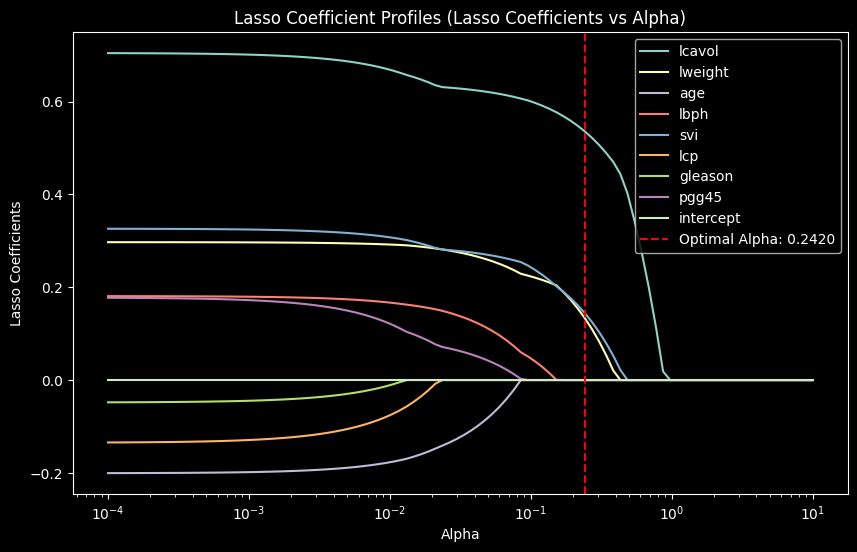

Optimal alpha: 0.2420128264794381
MSE on the test set with Lasso regression: 0.2902547015881801


In [9]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def lasso_regression(X_train, y_train, X_val, y_val, X_test, y_test):
    X_train_with_intercept = X_train.assign(intercept=1)
    X_val_with_intercept = X_val.assign(intercept=1)
    X_test_with_intercept = X_test.assign(intercept=1)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_with_intercept)
    X_val_scaled = scaler.transform(X_val_with_intercept)
    X_test_scaled = scaler.transform(X_test_with_intercept)

    # Range of alpha (lambda) values to sweep
    alpha_range = np.logspace(-4, 1, 100)

    # Cross-validation for Lasso to find the optimal alpha & store the coefficient profiles
    val_mse_list = []
    coefficient_profiles = []
    for alpha_value in alpha_range:
        lasso_model = Lasso(alpha=alpha_value, max_iter=100000)
        lasso_model.fit(X_train_scaled, y_train)

        y_val_pred = lasso_model.predict(X_val_scaled)
        val_mse_list.append(mean_squared_error(y_val, y_val_pred))

        coefficient_profiles.append(lasso_model.coef_)

    # Find the optimal alpha (lambda)
    optimal_alpha = alpha_range[np.argmin(val_mse_list)]

    # Train Lasso with the optimal alpha on the entire training set
    optimal_lasso_model = Lasso(alpha=optimal_alpha, max_iter=100000)
    optimal_lasso_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred_test = optimal_lasso_model.predict(X_test_scaled)
    # print("Coefficients:", optimal_lasso_model.coef_)

    # Calculate MSE on the test set
    mse_test_lasso = mean_squared_error(y_test, y_pred_test)

    # Calculate MSE on the train set
    y_train_pred = optimal_lasso_model.predict(X_train_scaled)
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Plot the Lasso Profiles (Coefficients vs Alpha)
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_range, np.array(coefficient_profiles), label=X_test_with_intercept.columns)
    plt.axvline(x=optimal_alpha, color='red', linestyle='--', label=f'Optimal Alpha: {optimal_alpha:.4f}')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Lasso Coefficients')
    plt.title('Lasso Coefficient Profiles (Lasso Coefficients vs Alpha)')
    plt.legend(loc='upper right')
    plt.show()

    return optimal_alpha, mse_test_lasso, train_mse

lasso_alpha, lasso_test_mse, lasso_train_mse = lasso_regression(X_train, y_train, X_val, y_val, X_test, y_test)
print("Optimal alpha:", lasso_alpha)
print("MSE on the test set with Lasso regression:", lasso_test_mse)

Which features did the Lasso select for you to include in your model? Do these features make sense?

- The Lasso selected the lcavol, lweight, and svi features. This makes sense because they had the highest Z-scores in the plain coefficients table from part a.

Compute the MSE on the training dataset and the test dataset for all methods and comment on the results.  Compare this MSE to a baseline MSE.

In [10]:
baseline_train_prediction = np.mean(y_train)
baseline_train_mse = np.mean((y_train - baseline_train_prediction) ** 2)
print("Baseline train MSE:", baseline_train_mse)
print("MSE on the train set with plain linear regression:", plain_train_mse)
print("MSE on the train set with Ridge regression:", ridge_train_mse)
print("MSE on the train set with Lasso regression:", lasso_train_mse)

baseline_test_prediction = np.mean(y_test)
baseline_test_mse = np.mean((y_test - baseline_test_prediction) ** 2)
print("Baseline test MSE:", baseline_test_mse)
print("MSE on the test set with plain linear regression:", plain_test_mse)
print("MSE on the test set with Ridge regression:", ridge_test_mse)
print("MSE on the test set with Lasso regression:", lasso_test_mse)

Baseline train MSE: 1.4472881631934376
MSE on the train set with plain linear regression: 0.4422635992140526
MSE on the train set with Ridge regression: 0.5798968988479426
MSE on the train set with Lasso regression: 0.6041256444560855
Baseline test MSE: 0.6579386897376976
MSE on the test set with plain linear regression: 0.41424762114386604
MSE on the test set with Ridge regression: 0.22810905585416497
MSE on the test set with Lasso regression: 0.2902547015881801


Plain linear regression has the lowest training MSE but performs worse on the test set, indicating overfitting. Ridge regression provides the best test performance, balancing generalization and fitting, while Lasso regression offers slightly higher test MSE but simplifies the model by selecting fewer features. Overall, Ridge regression performed best in terms of predictive accuracy.

## Wine Quality Dataset Analysis

Next, download a dataset suitable for linear regression from UCI or another repository. For now, this should be a dataset that only has numerical features, with no missing values. Repeat the analysis above on this dataset.

In [11]:
!pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
wine_X = wine_quality.data.features
wine_y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [13]:
from sklearn.model_selection import train_test_split

wine_y = wine_y.squeeze()  # Convert to 1D array
# Split into 80% train and 20% (validation + test)
wine_X_train, wine_X_temp, wine_y_train, wine_y_temp = train_test_split(wine_X, wine_y, train_size=0.8, random_state=30)
# Split the remaining 20% into 50% validation and 50% test
wine_X_val, wine_X_test, wine_y_val, wine_y_test = train_test_split(wine_X_temp, wine_y_temp, test_size=0.5, random_state=30)

In [14]:
wine_plain_coefficients, wine_plain_test_mse, wine_plain_train_mse = plain_linear_regression(wine_X_train, wine_y_train, wine_X_test, wine_y_test)
print(f"Beta coefficients: {wine_plain_coefficients}")
print(f"Mean Squared Error on the test set: {wine_plain_test_mse}")

Beta coefficients: [ 8.57986651e-02 -1.31788031e+00 -1.16906307e-01  5.00597637e-02
 -3.48003162e-01  5.44135483e-03 -2.50154003e-03 -6.70666551e+01
  5.47899351e-01  7.18510687e-01  2.55175248e-01  6.74577209e+01]
Mean Squared Error on the test set: 0.565855861009693


In [15]:
wine_correlation_matrix = generate_correlation_matrix(wine_X)
wine_correlation_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


In [16]:
wine_plain_coefficients_table = generate_coefficients_table(wine_X, wine_y)
wine_plain_coefficients_table

,Coefficient,Std. Error,Z Score
fixed_acidity,0.067684,0.015573,4.346235
volatile_acidity,-1.327892,0.077373,-17.162322
citric_acid,-0.109657,0.079619,-1.377274
residual_sugar,0.043559,0.005156,8.448558
chlorides,-0.483714,0.332683,-1.453977
free_sulfur_dioxide,0.005970,0.000751,7.947695
total_sulfur_dioxide,-0.002481,0.000277,-8.968878
density,-54.966942,12.137473,-4.528697
pH,0.439296,0.090371,4.861034
sulphates,0.768252,0.076123,10.092235


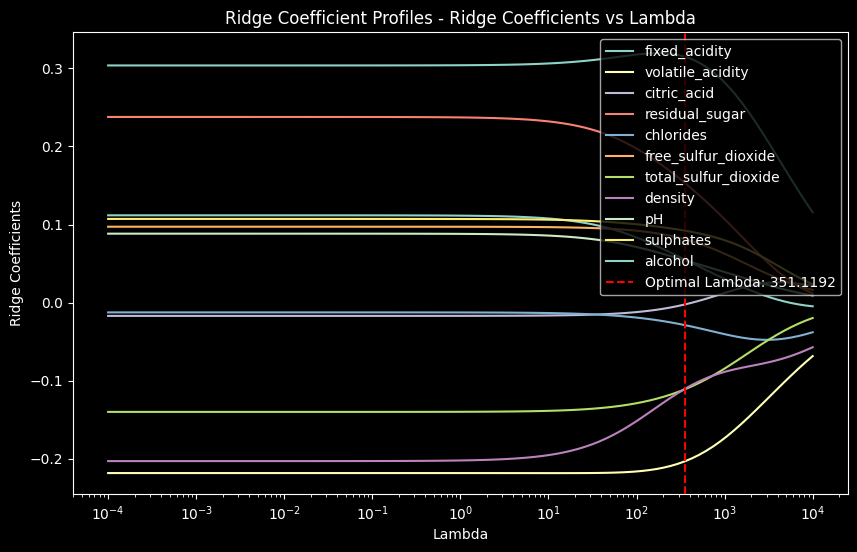

Optimal lambda: 351.11917342151344
MSE on the test set with Ridge regression: 0.566439892976659


In [17]:
wine_ridge_lambda, wine_ridge_test_mse, wine_ridge_train_mse = ridge_regression(wine_X_train, wine_y_train, wine_X_val, wine_y_val, wine_X_test, wine_y_test)
print("Optimal lambda:", wine_ridge_lambda)
print("MSE on the test set with Ridge regression:", wine_ridge_test_mse)

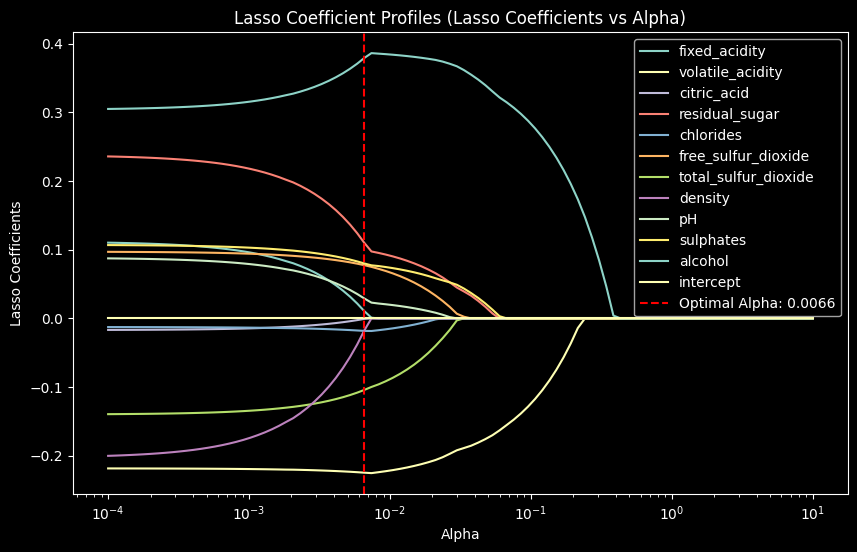

Optimal alpha: 0.006579332246575682
MSE on the test set with Lasso regression: 0.5645390319362024


In [18]:
wine_lasso_alpha, wine_lasso_test_mse, wine_lasso_train_mse = lasso_regression(wine_X_train, wine_y_train, wine_X_val, wine_y_val, wine_X_test, wine_y_test)
print("Optimal alpha:", wine_lasso_alpha)
print("MSE on the test set with Lasso regression:", wine_lasso_test_mse)

Which features did the Lasso select for you to include in your model? Do these features make sense?
- The Lasso did not completely exclude any features in this dataset, however the features fixed acidity, citric acid, and chlorides were significantly minimized. This makes sense as they all had relatively low Z-scores


Compute the MSE on the training dataset and the test dataset for all methods and comment on the results.  Compare this MSE to a baseline MSE.

In [19]:
wine_baseline_train_prediction = np.mean(wine_y_train)
wine_baseline_train_mse = np.mean((wine_y_train - wine_baseline_train_prediction) ** 2)
print("Baseline train MSE:", wine_baseline_train_mse)
print("MSE on the train set with plain linear regression:", wine_plain_train_mse)
print("MSE on the train set with Ridge regression:", wine_ridge_train_mse)
print("MSE on the train set with Lasso regression:", wine_lasso_train_mse)

wine_baseline_test_prediction = np.mean(wine_y_test)
wine_baseline_test_mse = np.mean((wine_y_test - wine_baseline_test_prediction) ** 2)
print("Baseline test MSE:", wine_baseline_test_mse)
print("MSE on the test set with plain linear regression:", wine_plain_test_mse)
print("MSE on the test set with Ridge regression:", wine_ridge_test_mse)
print("MSE on the test set with Lasso regression:", wine_lasso_test_mse)

Baseline train MSE: 0.7592043766165328
MSE on the train set with plain linear regression: 0.5341110979461935
MSE on the train set with Ridge regression: 0.5363433771835142
MSE on the train set with Lasso regression: 0.537299873912399
Baseline test MSE: 0.788553846153846
MSE on the test set with plain linear regression: 0.565855861009693
MSE on the test set with Ridge regression: 0.566439892976659
MSE on the test set with Lasso regression: 0.5645390319362024


While Ridge and Lasso provided regularization benefits and simplified the model, their MSEs suggest that the dataset's complexity or the limited relevance of the input features might make it hard for the models to significantly outperform the baseline in predicting wine quality.

### Stretch Goal
Stretch goal (2 points): Add nonlinear and interaction terms to your dataset and try to improve the performance. Are you able to do so?

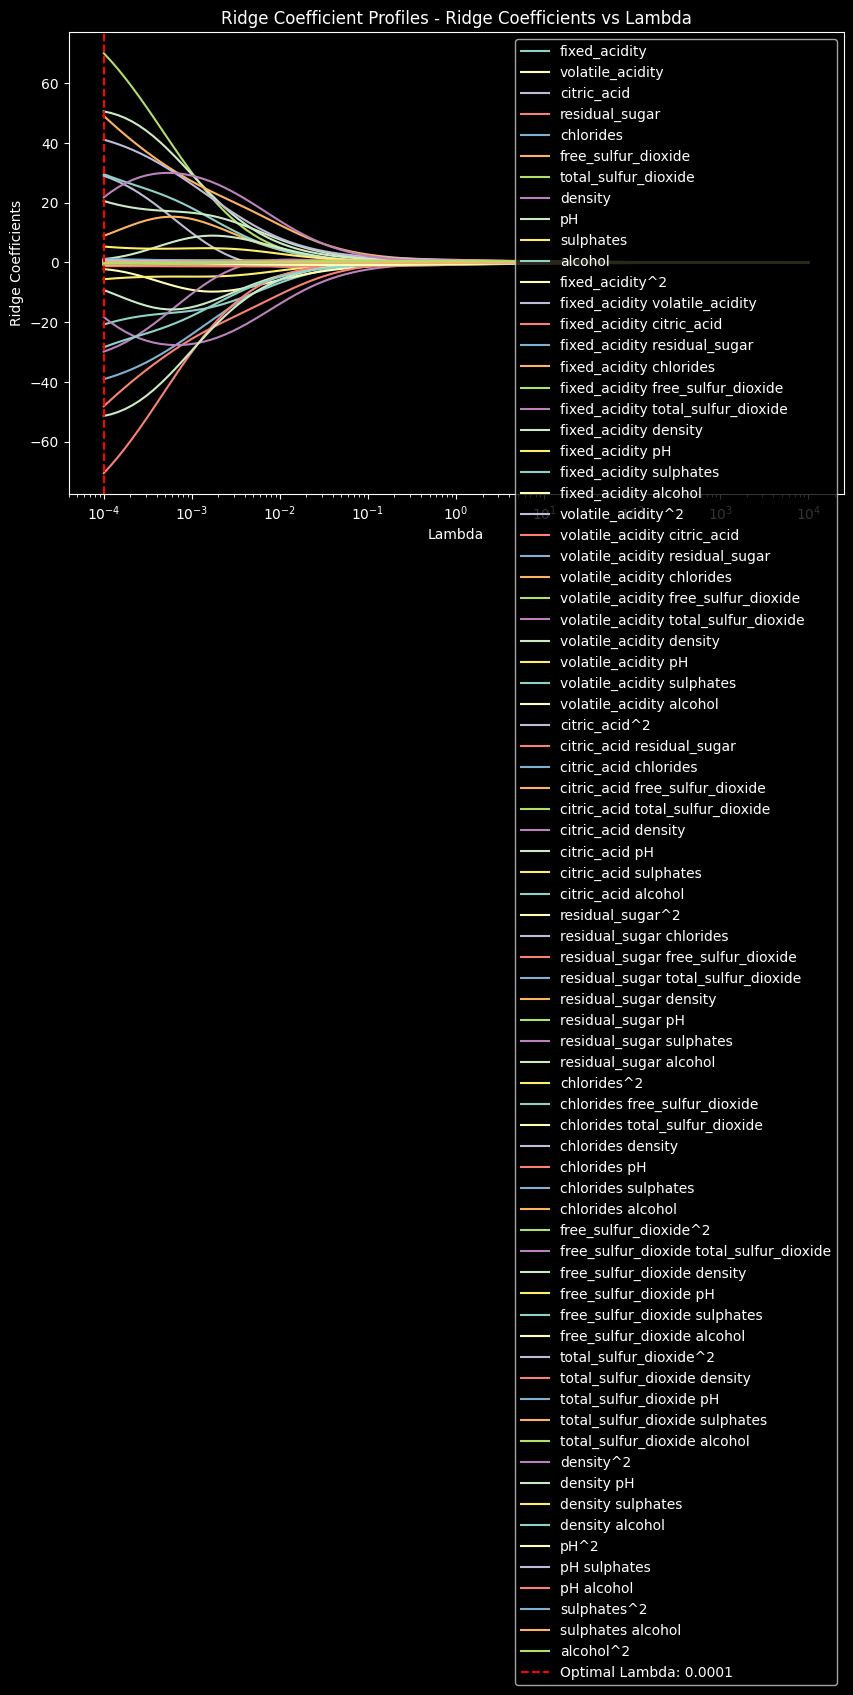

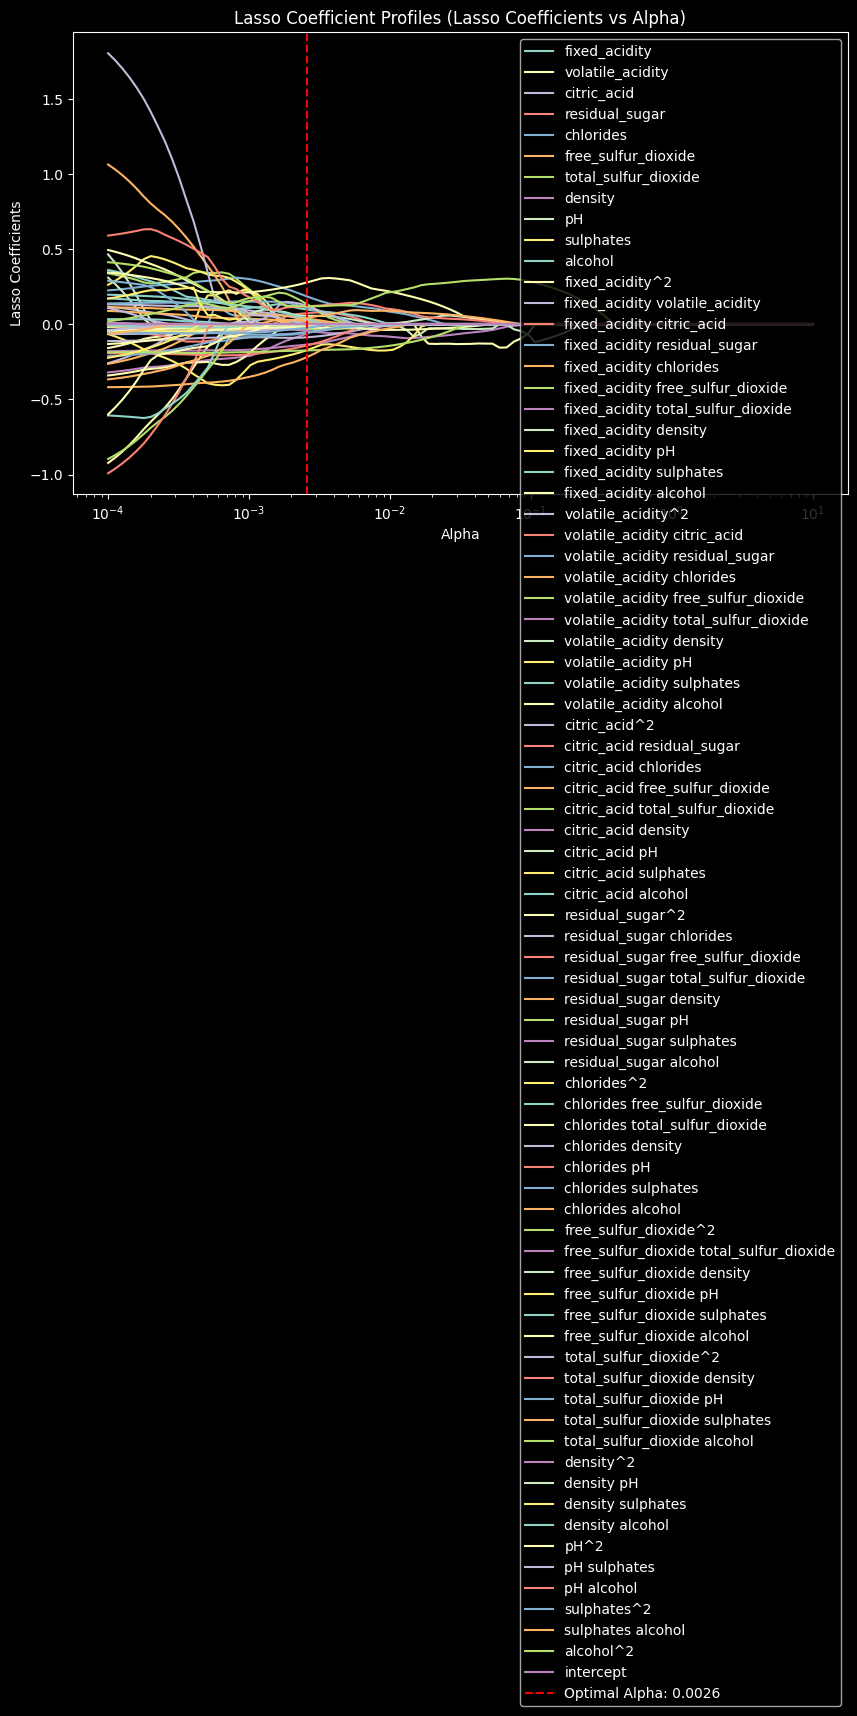

Baseline test MSE: 0.788553846153846
MSE with polynomial features using plain linear regression: 0.5299953878969562
MSE with polynomial features using Ridge regression: 0.5297291096374308
MSE with polynomial features using Lasso regression: 0.5498279087953849


In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
wine_X_train_poly = pd.DataFrame(poly.fit_transform(wine_X_train), columns=poly.get_feature_names_out(wine_X_train.columns))
wine_X_val_poly = pd.DataFrame(poly.transform(wine_X_val), columns=poly.get_feature_names_out(wine_X_val.columns))
wine_X_test_poly = pd.DataFrame(poly.transform(wine_X_test), columns=poly.get_feature_names_out(wine_X_test.columns))

# Predict using each Polynomial Features
wine_plain_poly_coefficients, wine_plain_poly_test_mse, wine_plain_poly_train_mse = plain_linear_regression(wine_X_train_poly, wine_y_train, wine_X_test_poly, wine_y_test)
wine_ridge_poly_lambda, wine_ridge_poly_test_mse, wine_ridge_poly_train_mse = ridge_regression(wine_X_train_poly, wine_y_train, wine_X_val_poly, wine_y_val, wine_X_test_poly, wine_y_test)
wine_lasso_poly_alpha, wine_lasso_poly_test_mse, wine_lasso_poly_train_mse = lasso_regression(wine_X_train_poly, wine_y_train, wine_X_val_poly, wine_y_val, wine_X_test_poly, wine_y_test)

print("Baseline test MSE:", wine_baseline_test_mse)
print("MSE with polynomial features using plain linear regression:", wine_plain_poly_test_mse)
print("MSE with polynomial features using Ridge regression:", wine_ridge_poly_test_mse)
print("MSE with polynomial features using Lasso regression:", wine_lasso_poly_test_mse)

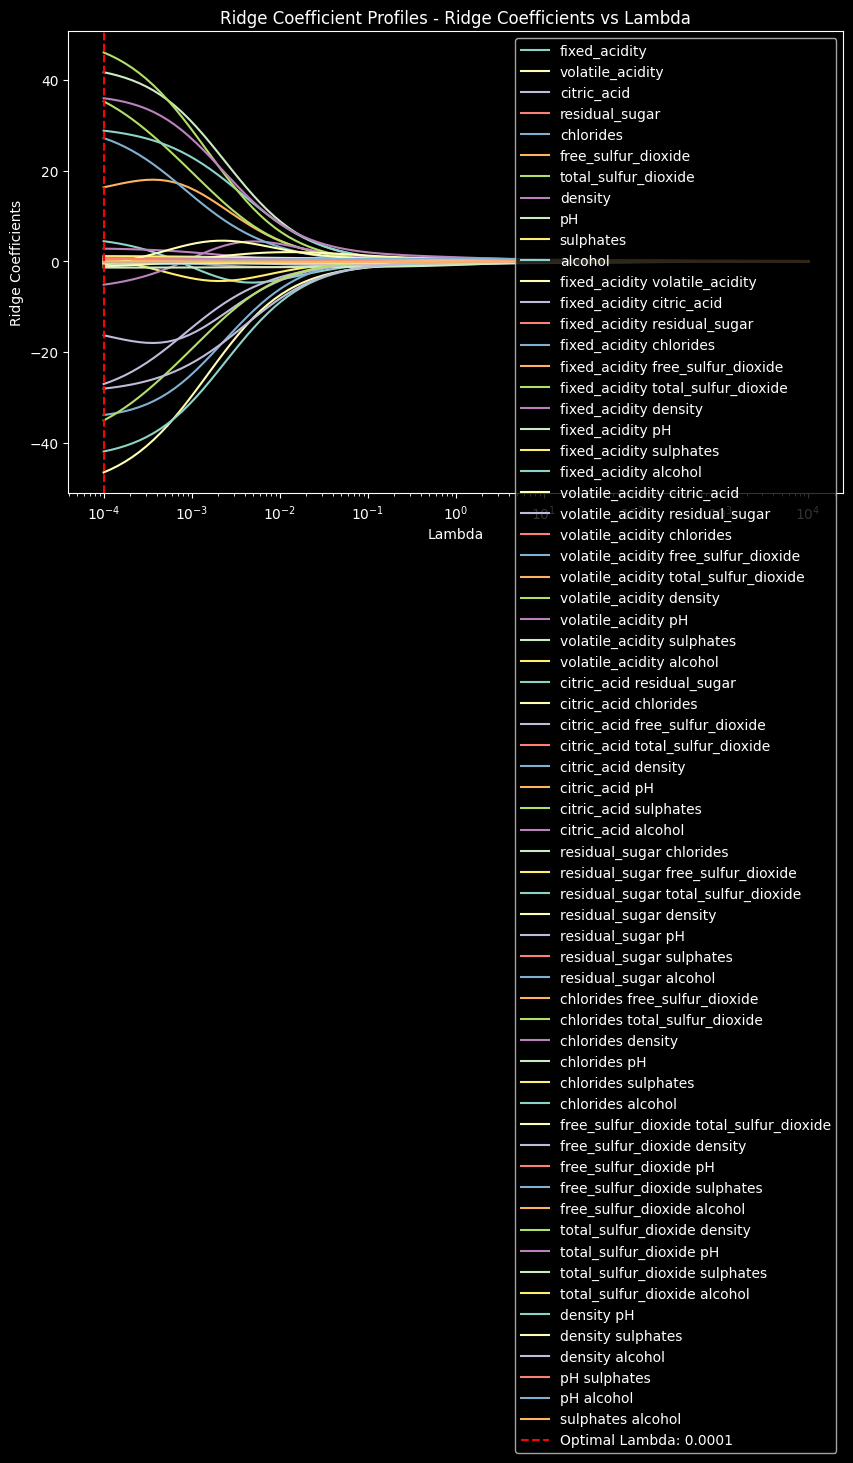

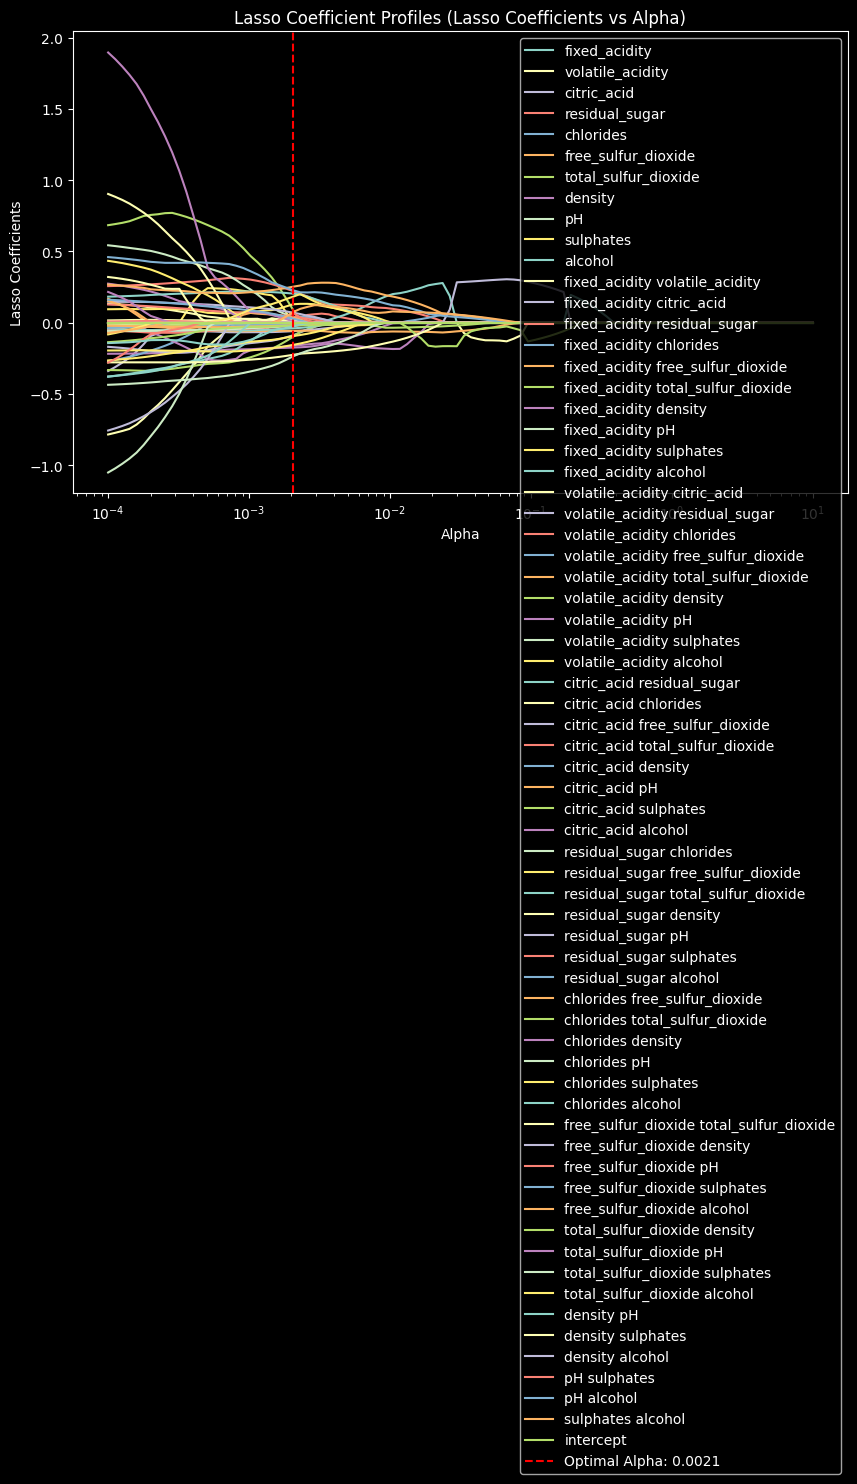

Baseline test MSE: 0.788553846153846
MSE with interaction features using plain linear regression: 0.5343452008118056
MSE with interaction features using Ridge regression: 0.5341190759156647
MSE with interaction features using Lasso regression: 0.5518366862695047


In [21]:
# Interaction Features
poly_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
wine_X_train_interaction = pd.DataFrame(poly_interaction.fit_transform(wine_X_train), columns=poly_interaction.get_feature_names_out(wine_X_train.columns))
wine_X_val_interaction = pd.DataFrame(poly_interaction.transform(wine_X_val), columns=poly_interaction.get_feature_names_out(wine_X_val.columns))
wine_X_test_interaction = pd.DataFrame(poly_interaction.transform(wine_X_test), columns=poly_interaction.get_feature_names_out(wine_X_test.columns))

# Predict using each Interaction Features
wine_plain_interaction_coefficients, wine_plain_interaction_test_mse, wine_plain_interaction_train_mse = plain_linear_regression(wine_X_train_interaction, wine_y_train, wine_X_test_interaction, wine_y_test)
wine_ridge_interaction_lambda, wine_ridge_interaction_test_mse, wine_ridge_interaction_train_mse = ridge_regression(wine_X_train_interaction, wine_y_train, wine_X_val_interaction, wine_y_val, wine_X_test_interaction, wine_y_test)
wine_lasso_interaction_alpha, wine_lasso_interaction_test_mse, wine_lasso_interaction_train_mse = lasso_regression(wine_X_train_interaction, wine_y_train, wine_X_val_interaction, wine_y_val, wine_X_test_interaction, wine_y_test)

print("Baseline test MSE:", wine_baseline_test_mse)
print("MSE with interaction features using plain linear regression:", wine_plain_interaction_test_mse)
print("MSE with interaction features using Ridge regression:", wine_ridge_interaction_test_mse)
print("MSE with interaction features using Lasso regression:", wine_lasso_interaction_test_mse)


I could not improve the performance of the predictions by adding Polynomial and interaction terms. I believe the features are just not correlated enough to the target.